1. Load and inspect data, and choose a subset

In [17]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# load properties
properties_2016 = pd.read_csv('./properties_2016.csv')
properties_2017 = pd.read_csv('./properties_2017.csv')
properties = pd.concat([properties_2016,properties_2017],ignore_index=True).drop_duplicates()

# load train
train_2016 = pd.read_csv('./train_2016_v2.csv', parse_dates=['transactiondate'])
train_2017 = pd.read_csv('./train_2017.csv', parse_dates=['transactiondate'])
train = pd.concat([train_2016,train_2017],ignore_index=True).drop_duplicates()
    
# merge properties and train
data = pd.merge(properties, train, on='parcelid', how='inner')

# a peek of data
print(data.shape)
data.head()

(335776, 60)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,494390.0,859741.0,2015.0,365351.0,9608.74,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
1,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
2,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,128881.0,429608.0,2015.0,300727.0,5494.04,NaN,NaN,6.111001e+13,0.073985,2017-07-26
3,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
4,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,...,190508.0,282303.0,2015.0,91795.0,2954.74,NaN,NaN,6.111001e+13,0.071886,2017-07-28


Column 0: "parcelid"
Column 1-57: features
Column 58: target "logerror"
Column 59: "transactiondate"

The meanings of features are described below:

In [73]:
# describ features
attributes = pd.read_excel('./zillow_data_dictionary.xlsx')
attributes.style.set_properties(**{'text-align': 'left'})

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (if any)
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
2,'basementsqft',Finished living area below or partially below ground level
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the building from best (lowest) to worst (highest)
6,'buildingclasstypeid',"The building framing type (steel frame, wood frame, concrete/brick)"
7,'calculatedbathnbr',Number of bathrooms in home including fractional bathroom
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + sink + toilet)


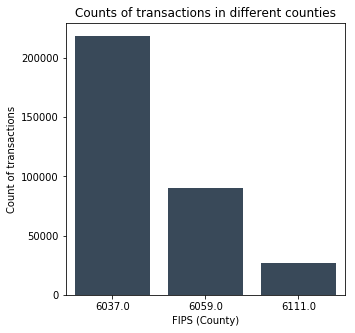

In [56]:
# check the counts of transactions in each county
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
fips_dataset = data['fips'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(fips_dataset.index, fips_dataset.values,color='#34495e')
plt.xlabel('FIPS (County)')
plt.ylabel('Count of transactions')
plt.title('Counts of transactions in different counties')
plt.show()

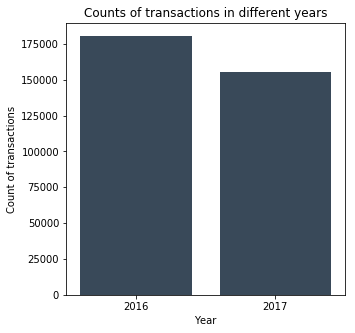

In [75]:
# check the counts of transactions in each year
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
data['transaction_month'] = data['transactiondate'].dt.year
month_dataset = data['transaction_month'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(month_dataset.index, month_dataset.values,color='#34495e')
plt.xlabel('Year')
plt.ylabel('Count of transactions')
plt.title('Counts of transactions in different years')
plt.show()

We choose data of transtrations in Los Angeles (FIPS: 6037) to do the folowing work.

In [82]:
# choose data of '6037'
data_6037 = data.loc[data['fips'] == 6037.0]

C:\Users\panwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\panwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\panwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\panwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to b

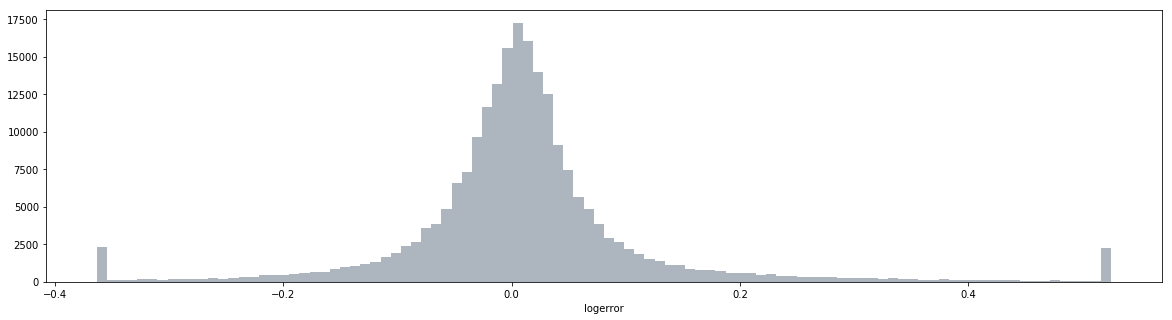

In [81]:
# logerror follows nice normal distribution
# https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity
ulimit = np.percentile(data_6037['logerror'].values, 99)
llimit = np.percentile(data_6037['logerror'].values, 1)
data_6037['logerror'].ix[data_6037['logerror']>ulimit] = ulimit
data_6037['logerror'].ix[data_6037['logerror']<llimit] = llimit

plt.figure(figsize=(20,5))
sns.distplot(data_6037.logerror.values, bins=100, kde=False, color='#34495e')
plt.xlabel('logerror')
plt.show()

In [83]:
# calculate the std
print(np.std(data_6037['logerror'].values))

0.16729578687697255


2. Clean data

3. Rank features